# MNIST訓練

Layer1: 120 layers

Layer2: 100 layers

Layer3: 80 layers

Layer4: 90 layers

Activation Function: Relu

Loss Function: MSE

Optimizer: Adam

訓練時，最高正確率：99.77%

測試時正確率：97.95%

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [5]:
from keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Activation
import keras.optimizers

In [40]:
x_train_1 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_1 = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [100]:
model_1 = Sequential()
model_1.add(Dense(120, input_dim=784))
model_1.add(Activation("relu"))
model_1.add(Dense(100))
model_1.add(Activation("relu"))
model_1.add(Dense(80))
model_1.add(Activation("relu"))
model_1.add(Dense(90))
model_1.add(Activation("relu"))
model_1.add(Dense(10))
model_1.add(Activation("relu"))
model_1.compile(loss = 'mse', 
              optimizer = 'Adam',
              metrics = ["accuracy"])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 120)               94200     
_________________________________________________________________
activation_231 (Activation)  (None, 120)               0         
_________________________________________________________________
dense_232 (Dense)            (None, 100)               12100     
_________________________________________________________________
activation_232 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_233 (Dense)            (None, 80)                8080      
_________________________________________________________________
activation_233 (Activation)  (None, 80)                0         
_________________________________________________________________
dense_234 (Dense)            (None, 90)                7290      
__________

In [101]:
model_1_50 = model_1.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 50,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.0144 - acc: 0.9237 - val_loss: 0.0073 - val_acc: 0.9602
Epoch 2/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0058 - acc: 0.9700 - val_loss: 0.0055 - val_acc: 0.9702
Epoch 3/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0040 - acc: 0.9787 - val_loss: 0.0047 - val_acc: 0.9723
Epoch 4/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0032 - acc: 0.9832 - val_loss: 0.0045 - val_acc: 0.9731
Epoch 5/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0026 - acc: 0.9863 - val_loss: 0.0042 - val_acc: 0.9744
Epoch 6/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.0023 - acc: 0.9877 - val_loss: 0.0041 - val_acc: 0.9751
Epoch 7/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.0020 - acc: 0.9895 - val_loss: 0.0038 - val_ac

In [102]:
score = model_1.evaluate(x_test_1,y_test)

10000/10000 [==============================] - 1s 119us/step


In [103]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.00343644755004
測試資料正確率: 0.9795


Text(0.5,0,'epoch')

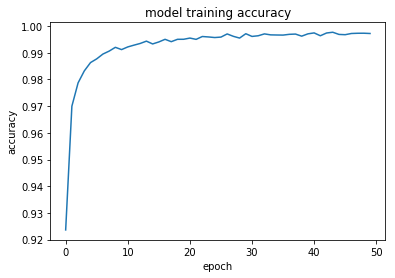

In [104]:
plt.plot(model_1_50.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

Text(0.5,0,'epoch')

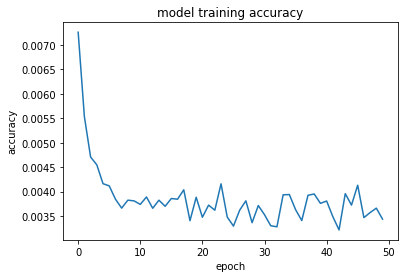

In [105]:
plt.plot(model_1_50.history["val_loss"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")